In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

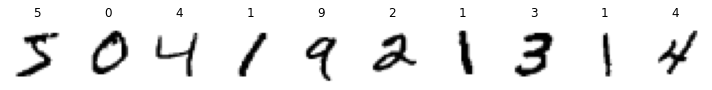

In [3]:
fig,ax = plt.subplots(nrows = 1, ncols = 10, figsize = (10,7))

for (label,ax,image) in zip(train_labels, ax, train_images):
    ax.imshow(image, plt.cm.gray_r)
    ax.axis('off')
    ax.set_title(label)
    plt.tight_layout()
    
plt.show()

In [4]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255

In [5]:
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)
test_images.shape

TensorShape([10000, 28, 28, 1])

In [ ]:
num_classes = 10

train_labels = tf.keras.utils.to_categorical(train_images, num_classes)
test_labels = tf.keras.utils.to_categorical(test_images, num_classes)

In [13]:
# dir(tf.keras.layers)

In [15]:
model = Sequential([
#     layers.Input(shape = (28, 28, 1), batch_size = 64),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 41,866
Trainable params: 41,866
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])

In [18]:
model.fit(train_images, train_labels, validation_split = 0.1, verbose = 2, epochs = 10)

Epoch 1/10


TypeError: in user code:

    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:735 __init__  **
        super(SparseCategoricalCrossentropy, self).__init__(
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:238 __init__
        super(LossFunctionWrapper, self).__init__(reduction=reduction, name=name)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:99 __init__
        losses_utils.ReductionV2.validate(reduction)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/ops/losses/loss_reduction.py:67 validate
        if key not in cls.all():
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/ops/math_ops.py:1750 tensor_equals
        return gen_math_ops.equal(self, other, incompatible_shape_error=False)
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/ops/gen_math_ops.py:3177 equal
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py:527 _apply_op_helper
        raise TypeError(

    TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'auto' of type 'str' instead. Error: Expected float32, got 'auto' of type 'str' instead.
